In [1]:
# from AHPLib import *
import pandas as pd
import numpy as np


import inputs_AHPLib as cdf_inp
import structs_AHPLib as cdf_str
import calcs_AHPLib as cdf_calc

#set here the number of decimals that you want to be displayed
%precision 4
np.set_printoptions(suppress=True,precision=4)


In [2]:
Energy = cdf_str.Model() 

print(Energy)

Nodes: []
 Clusters: []
 Node Connections: []
 Cluster Connections: []


#### Creating the nodes

In [3]:
goal_node = cdf_str.Node("GoalNode",0)

In [4]:
AmountOfElectricity = cdf_str.Node("AmountOfElectricity",1)
Reliability = cdf_str.Node("Reliability",2)
Costs = cdf_str.Node("Costs",3)
EnvironmentalImpact = cdf_str.Node("EnvironmentalImpact", 4)
EnergyAmortization = cdf_str.Node("EnergyAmortization",5)
Potential = cdf_str.Node("Potential",6)

In [5]:
OperatingCosts = cdf_str.Node("OperatingCosts",7)
ElectricProductionCosts = cdf_str.Node("ElectricProductionCosts",8)

In [6]:
alt1 = cdf_str.Node("WindEnergy",9)
alt2 = cdf_str.Node("Photovoltaic",10)
alt3 = cdf_str.Node("HydroElectric",11)

In [7]:
print(alt1,"\n",alt2,"\n",alt3)

WindEnergy NID: 9 order: 9 
 Photovoltaic NID: 10 order: 10 
 HydroElectric NID: 11 order: 11


#### Creating the clusters

In [8]:
cluster0 = cdf_str.Cluster("1Goal",0)
cluster1 = cdf_str.Cluster("2Criteria",1)
cluster2 = cdf_str.Cluster("3SubCriteria",2)
cluster3 = cdf_str.Cluster("4Alternatives",3)

### Adding the nodes to their cluster

In [9]:
cluster0.addNode2Cluster(goal_node)   
#Cluster goal

In [10]:
cluster1.addNode2Cluster(AmountOfElectricity)  
cluster1.addNode2Cluster(Reliability)
cluster1.addNode2Cluster(Costs)
cluster1.addNode2Cluster(EnvironmentalImpact)
cluster1.addNode2Cluster(EnergyAmortization)
cluster1.addNode2Cluster(Potential)

#Cluster criteria

In [11]:
cluster2.addNode2Cluster(OperatingCosts)
cluster2.addNode2Cluster(ElectricProductionCosts)
#Cluster subcriteria

In [12]:
cluster3.addNode2Cluster(alt1)
cluster3.addNode2Cluster(alt2)
cluster3.addNode2Cluster(alt3)
#Cluster Alternatives

In [13]:
cluster0.printWithNodes()
cluster1.printWithNodes()
cluster2.printWithNodes()
cluster3.printWithNodes()

Cluster: 1Goal with nodes: [GoalNode NID: 0 order: 0]

Cluster: 2Criteria with nodes: [AmountOfElectricity NID: 1 order: 1, Reliability NID: 2 order: 2, Costs NID: 3 order: 3, EnvironmentalImpact NID: 4 order: 4, EnergyAmortization NID: 5 order: 5, Potential NID: 6 order: 6]

Cluster: 3SubCriteria with nodes: [OperatingCosts NID: 7 order: 7, ElectricProductionCosts NID: 8 order: 8]

Cluster: 4Alternatives with nodes: [WindEnergy NID: 9 order: 9, Photovoltaic NID: 10 order: 10, HydroElectric NID: 11 order: 11]



### Add clusters to the model

In [14]:
Energy.addCluster2Model(cluster0)
Energy.addCluster2Model(cluster1)
Energy.addCluster2Model(cluster2)
Energy.addCluster2Model(cluster3)

In [15]:
print(Energy)

Nodes: [GoalNode NID: 0 order: 0, AmountOfElectricity NID: 1 order: 1, Reliability NID: 2 order: 2, Costs NID: 3 order: 3, EnvironmentalImpact NID: 4 order: 4, EnergyAmortization NID: 5 order: 5, Potential NID: 6 order: 6, OperatingCosts NID: 7 order: 7, ElectricProductionCosts NID: 8 order: 8, WindEnergy NID: 9 order: 9, Photovoltaic NID: 10 order: 10, HydroElectric NID: 11 order: 11]
 Clusters: [1Goal CID:  0 order: 0, 2Criteria CID:  1 order: 1, 3SubCriteria CID:  2 order: 2, 4Alternatives CID:  3 order: 3]
 Node Connections: []
 Cluster Connections: []


### Set up Node connections

In [16]:
Energy.addNodeConnectionFromNodeToAllNodesOfCluster("GoalNode","2Criteria")
#creat all the connections from the given Node name"GoalNode" to given Cluster name="2Criteria"

In [17]:
Energy.addNodeConnectionFromNodeToAllNodesOfCluster("Costs","3SubCriteria")

In [18]:
Energy.addNodeConnectionFromAllNodesToAllNodesOfCluster("3SubCriteria","4Alternatives")

In [19]:
Energy.addNodeConnectionFromNodeToAllNodesOfCluster("AmountOfElectricity","4Alternatives")

In [20]:
Energy.addNodeConnectionFromNodeToAllNodesOfCluster("Reliability","4Alternatives")

In [21]:
Energy.addNodeConnectionFromNodeToAllNodesOfCluster("EnvironmentalImpact","4Alternatives")

In [22]:
Energy.addNodeConnectionFromNodeToAllNodesOfCluster("EnergyAmortization","4Alternatives")

In [23]:
Energy.addNodeConnectionFromNodeToAllNodesOfCluster("Potential","4Alternatives")

In [24]:
print(Energy)

Nodes: [GoalNode NID: 0 order: 0, AmountOfElectricity NID: 1 order: 1, Reliability NID: 2 order: 2, Costs NID: 3 order: 3, EnvironmentalImpact NID: 4 order: 4, EnergyAmortization NID: 5 order: 5, Potential NID: 6 order: 6, OperatingCosts NID: 7 order: 7, ElectricProductionCosts NID: 8 order: 8, WindEnergy NID: 9 order: 9, Photovoltaic NID: 10 order: 10, HydroElectric NID: 11 order: 11]
 Clusters: [1Goal CID:  0 order: 0, 2Criteria CID:  1 order: 1, 3SubCriteria CID:  2 order: 2, 4Alternatives CID:  3 order: 3]
 Node Connections: {GoalNode NID: 0 order: 0: [AmountOfElectricity NID: 1 order: 1, Reliability NID: 2 order: 2, Costs NID: 3 order: 3, EnvironmentalImpact NID: 4 order: 4, EnergyAmortization NID: 5 order: 5, Potential NID: 6 order: 6], AmountOfElectricity NID: 1 order: 1: [WindEnergy NID: 9 order: 9, Photovoltaic NID: 10 order: 10, HydroElectric NID: 11 order: 11], Reliability NID: 2 order: 2: [WindEnergy NID: 9 order: 9, Photovoltaic NID: 10 order: 10, HydroElectric NID: 11 ord

In [25]:
Energy.showAllClusterConnections()

Connection(s) from cluster 1Goal CID:  0 order: 0
 to: 2Criteria CID:  1 order: 1
Connection(s) from cluster 2Criteria CID:  1 order: 1
 to: 3SubCriteria CID:  2 order: 2
 to: 4Alternatives CID:  3 order: 3
Connection(s) from cluster 3SubCriteria CID:  2 order: 2
 to: 4Alternatives CID:  3 order: 3
No connections from 4Alternatives


In [26]:
Energy.showAllNodeConnections()

Connections from node GoalNode NID: 0 order: 0
 to: AmountOfElectricity NID: 1 order: 1
 to: Reliability NID: 2 order: 2
 to: Costs NID: 3 order: 3
 to: EnvironmentalImpact NID: 4 order: 4
 to: EnergyAmortization NID: 5 order: 5
 to: Potential NID: 6 order: 6
Connections from node AmountOfElectricity NID: 1 order: 1
 to: WindEnergy NID: 9 order: 9
 to: Photovoltaic NID: 10 order: 10
 to: HydroElectric NID: 11 order: 11
Connections from node Reliability NID: 2 order: 2
 to: WindEnergy NID: 9 order: 9
 to: Photovoltaic NID: 10 order: 10
 to: HydroElectric NID: 11 order: 11
Connections from node Costs NID: 3 order: 3
 to: OperatingCosts NID: 7 order: 7
 to: ElectricProductionCosts NID: 8 order: 8
Connections from node EnvironmentalImpact NID: 4 order: 4
 to: WindEnergy NID: 9 order: 9
 to: Photovoltaic NID: 10 order: 10
 to: HydroElectric NID: 11 order: 11
Connections from node EnergyAmortization NID: 5 order: 5
 to: WindEnergy NID: 9 order: 9
 to: Photovoltaic NID: 10 order: 10
 to: Hydr

In [27]:
##

In [28]:
q1 =cdf_inp.genFullQuest(Energy,"dominant")
print(q1)
# cdf_inp.printQuest(q1)

[['With respect to GoalNode, which one is more dominant: AmountOfElectricity or Reliability ? By how much?', 'With respect to GoalNode, which one is more dominant: AmountOfElectricity or Costs ? By how much?', 'With respect to GoalNode, which one is more dominant: AmountOfElectricity or EnvironmentalImpact ? By how much?', 'With respect to GoalNode, which one is more dominant: AmountOfElectricity or EnergyAmortization ? By how much?', 'With respect to GoalNode, which one is more dominant: AmountOfElectricity or Potential ? By how much?', 'With respect to GoalNode, which one is more dominant: Reliability or Costs ? By how much?', 'With respect to GoalNode, which one is more dominant: Reliability or EnvironmentalImpact ? By how much?', 'With respect to GoalNode, which one is more dominant: Reliability or EnergyAmortization ? By how much?', 'With respect to GoalNode, which one is more dominant: Reliability or Potential ? By how much?', 'With respect to GoalNode, which one is more dominant

In [29]:
cdf_inp.export4ExcelQuestFull(Energy,'EnergyEmpty.xlsx')

In [30]:
cdf_inp.importFromExcel(Energy,"EnergyFull.xlsx",0)

File Len= 63
row: 0
0 In cluster: 2Criteria
[[1.     1.15   1.5    2.2    2.7    1.3   ]
 [0.8696 1.     1.2    2.     2.25   1.1   ]
 [0.6667 0.8333 1.     1.7    1.85   0.8   ]
 [0.4545 0.5    0.5882 1.     1.25   0.5   ]
 [0.3704 0.4444 0.5405 0.8    1.     0.45  ]
 [0.7692 0.9091 1.25   2.     2.2222 1.    ]]
9 with respect to: AmountOfElectricity
10 In cluster: 4Alternatives
[[1.     3.     3.25  ]
 [0.3333 1.     1.1   ]
 [0.3077 0.9091 1.    ]]
16 with respect to: Reliability
17 In cluster: 4Alternatives
[[1.     1.7    1.5   ]
 [0.5882 1.     0.9   ]
 [0.6667 1.1111 1.    ]]
23 with respect to: Costs
24 In cluster: 3SubCriteria
[[1.  0.5]
 [2.  1. ]]
29 with respect to: EnvironmentalImpact
30 In cluster: 4Alternatives
[[1.     0.8    2.    ]
 [1.25   1.     3.    ]
 [0.5    0.3333 1.    ]]
36 with respect to: EnergyAmortization
37 In cluster: 4Alternatives
[[1.     2.75   2.5   ]
 [0.3636 1.     0.5   ]
 [0.4    2.     1.    ]]
43 with respect to: Potential
44 In cluster: 4Alte

In [32]:
print(Energy.all_pc_matrices)

[array([[1.    , 1.15  , 1.5   , 2.2   , 2.7   , 1.3   ],
       [0.8696, 1.    , 1.2   , 2.    , 2.25  , 1.1   ],
       [0.6667, 0.8333, 1.    , 1.7   , 1.85  , 0.8   ],
       [0.4545, 0.5   , 0.5882, 1.    , 1.25  , 0.5   ],
       [0.3704, 0.4444, 0.5405, 0.8   , 1.    , 0.45  ],
       [0.7692, 0.9091, 1.25  , 2.    , 2.2222, 1.    ]]), array([[1.    , 3.    , 3.25  ],
       [0.3333, 1.    , 1.1   ],
       [0.3077, 0.9091, 1.    ]]), array([[1.    , 1.7   , 1.5   ],
       [0.5882, 1.    , 0.9   ],
       [0.6667, 1.1111, 1.    ]]), array([[1. , 0.5],
       [2. , 1. ]]), array([[1.    , 0.8   , 2.    ],
       [1.25  , 1.    , 3.    ],
       [0.5   , 0.3333, 1.    ]]), array([[1.    , 2.75  , 2.5   ],
       [0.3636, 1.    , 0.5   ],
       [0.4   , 2.    , 1.    ]]), array([[1.    , 1.15  , 2.    ],
       [0.8696, 1.    , 1.9   ],
       [0.5   , 0.5263, 1.    ]]), array([[1.    , 0.5   , 1.5   ],
       [2.    , 1.    , 2.5   ],
       [0.6667, 0.4   , 1.    ]]), array([[1

In [33]:
super=cdf_calc.calcUnweightedSuperMatrix(Energy)
print(super)


[[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.2409 0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.2057 0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.1655 0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.1035 0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.0882 0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.1962 0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.     0.     0.     0.3333 0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.     0.     0.     0.6667 0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.     0.6093 0.4436 0.     0.3573 0.5599 0.42   0.2785 0.3018 0.
  0.     0.    ]
 [0.     0.2041 0.2627 0.     0.4746 0.1668 0.3761 0.5242 0.4837 0.
  0.     0.    ]
 [0.     0.1865 0.2938 0.     0.1681 0.2733 0.2039 0.1973 0.2145 

In [34]:
ret=cdf_calc.calcHierarchy(Energy.supermatrix)
print(ret)

[[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.1113 0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.095  0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.0764 0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.0478 0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.0407 0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.0906 0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.0255 0.     0.     0.1667 0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.0509 0.     0.     0.3333 0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.2103 0.6093 0.4436 0.147  0.3573 0.5599 0.42   0.2785 0.3018 0.
  0.     0.    ]
 [0.1492 0.2041 0.2627 0.2486 0.4746 0.1668 0.3761 0.5242 0.4837 0.
  0.     0.    ]
 [0.1023 0.1865 0.2938 0.1044 0.1681 0.2733 0.2039 0.1973 0.2145 

In [35]:
limit=cdf_calc.calcLimitingPriorities(Energy.supermatrix)

[0.     0.1113 0.095  0.0764 0.0478 0.0407 0.0906 0.0255 0.0509 0.2103
 0.1492 0.1023]


In [36]:
bycluster=cdf_calc.calcPrioritiesNormalizedByCluster(Energy.supermatrix,Energy)

0.0
Synthesized results: [0.3955 0.3743 0.2302]
0.1
Synthesized results: [0.4182 0.3562 0.2255]
0.2
Synthesized results: [0.4366 0.3416 0.2218]
0.30000000000000004
Synthesized results: [0.4517 0.3296 0.2187]
0.4
Synthesized results: [0.4644 0.3195 0.2161]
0.5
Synthesized results: [0.4752 0.3109 0.2139]
0.6000000000000001
Synthesized results: [0.4845 0.3035 0.212 ]
0.7000000000000001
Synthesized results: [0.4926 0.297  0.2104]
0.8
Synthesized results: [0.4997 0.2914 0.2089]
0.9
Synthesized results: [0.506  0.2864 0.2076]
1.0
Synthesized results: [0.5116 0.2819 0.2065]
0.0
Synthesized results: [0.3955 0.3743 0.2302]
0.1
Synthesized results: [0.4182 0.3562 0.2255]
0.2
Synthesized results: [0.4366 0.3416 0.2218]
0.30000000000000004
Synthesized results: [0.4517 0.3296 0.2187]
0.4
Synthesized results: [0.4644 0.3195 0.2161]
0.5
Synthesized results: [0.4752 0.3109 0.2139]
0.6000000000000001
Synthesized results: [0.4845 0.3035 0.212 ]
0.7000000000000001
Synthesized results: [0.4926 0.297  0.21

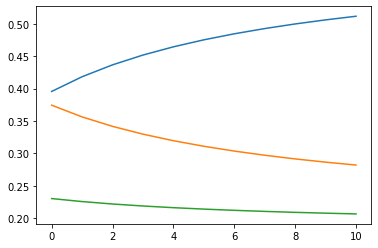

In [37]:
cdf_calc.sensitivityCellSupermatrixShort(super,1,"4Alternatives",Energy)

cdf_calc.sensitivityCellSupermatrixPlot(super,1,"4Alternatives",Energy)

0.0
Synthesized results: [0.443  0.3537 0.2033]
0.1
Synthesized results: [0.4431 0.3444 0.2125]
0.2
Synthesized results: [0.4431 0.3368 0.2201]
0.30000000000000004
Synthesized results: [0.4431 0.3305 0.2263]
0.4
Synthesized results: [0.4432 0.3252 0.2316]
0.5
Synthesized results: [0.4432 0.3207 0.2361]
0.6000000000000001
Synthesized results: [0.4432 0.3167 0.24  ]
0.7000000000000001
Synthesized results: [0.4433 0.3133 0.2434]
0.8
Synthesized results: [0.4433 0.3103 0.2464]
0.9
Synthesized results: [0.4433 0.3076 0.2491]
1.0
Synthesized results: [0.4433 0.3052 0.2515]
0.0
Synthesized results: [0.443  0.3537 0.2033]
0.1
Synthesized results: [0.4431 0.3444 0.2125]
0.2
Synthesized results: [0.4431 0.3368 0.2201]
0.30000000000000004
Synthesized results: [0.4431 0.3305 0.2263]
0.4
Synthesized results: [0.4432 0.3252 0.2316]
0.5
Synthesized results: [0.4432 0.3207 0.2361]
0.6000000000000001
Synthesized results: [0.4432 0.3167 0.24  ]
0.7000000000000001
Synthesized results: [0.4433 0.3133 0.24

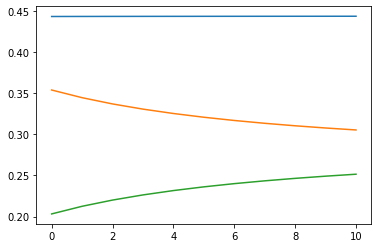

In [38]:
cdf_calc.sensitivityCellSupermatrixShort(super,2,"4Alternatives",Energy)

cdf_calc.sensitivityCellSupermatrixPlot(super,2,"4Alternatives",Energy)

0.0
Synthesized results: [0.4431 0.3364 0.2205]
0.1
Synthesized results: [0.4292 0.3523 0.2185]
0.2
Synthesized results: [0.4174 0.3657 0.2168]
0.30000000000000004
Synthesized results: [0.4074 0.3772 0.2154]
0.4
Synthesized results: [0.3987 0.3871 0.2142]
0.5
Synthesized results: [0.3911 0.3957 0.2131]
0.6000000000000001
Synthesized results: [0.3844 0.4034 0.2122]
0.7000000000000001
Synthesized results: [0.3785 0.4102 0.2114]
0.8
Synthesized results: [0.3732 0.4162 0.2106]
0.9
Synthesized results: [0.3684 0.4217 0.2099]
1.0
Synthesized results: [0.3641 0.4266 0.2093]
0.0
Synthesized results: [0.4431 0.3364 0.2205]
0.1
Synthesized results: [0.4292 0.3523 0.2185]
0.2
Synthesized results: [0.4174 0.3657 0.2168]
0.30000000000000004
Synthesized results: [0.4074 0.3772 0.2154]
0.4
Synthesized results: [0.3987 0.3871 0.2142]
0.5
Synthesized results: [0.3911 0.3957 0.2131]
0.6000000000000001
Synthesized results: [0.3844 0.4034 0.2122]
0.7000000000000001
Synthesized results: [0.3785 0.4102 0.21

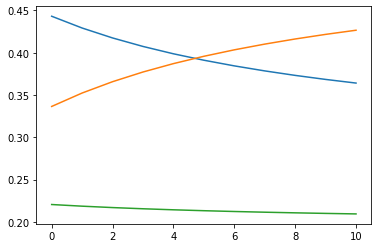

In [39]:
cdf_calc.sensitivityCellSupermatrixShort(super,7,"4Alternatives",Energy)

cdf_calc.sensitivityCellSupermatrixPlot(super,7,"4Alternatives",Energy)

0.0
Synthesized results: [0.4431 0.3364 0.2205]
0.1
Synthesized results: [0.4312 0.3489 0.22  ]
0.2
Synthesized results: [0.4211 0.3594 0.2195]
0.30000000000000004
Synthesized results: [0.4124 0.3684 0.2192]
0.4
Synthesized results: [0.405  0.3762 0.2188]
0.5
Synthesized results: [0.3985 0.383  0.2186]
0.6000000000000001
Synthesized results: [0.3927 0.389  0.2183]
0.7000000000000001
Synthesized results: [0.3876 0.3943 0.2181]
0.8
Synthesized results: [0.383  0.399  0.2179]
0.9
Synthesized results: [0.3789 0.4033 0.2178]
1.0
Synthesized results: [0.3752 0.4072 0.2176]
0.0
Synthesized results: [0.4431 0.3364 0.2205]
0.1
Synthesized results: [0.4312 0.3489 0.22  ]
0.2
Synthesized results: [0.4211 0.3594 0.2195]
0.30000000000000004
Synthesized results: [0.4124 0.3684 0.2192]
0.4
Synthesized results: [0.405  0.3762 0.2188]
0.5
Synthesized results: [0.3985 0.383  0.2186]
0.6000000000000001
Synthesized results: [0.3927 0.389  0.2183]
0.7000000000000001
Synthesized results: [0.3876 0.3943 0.21

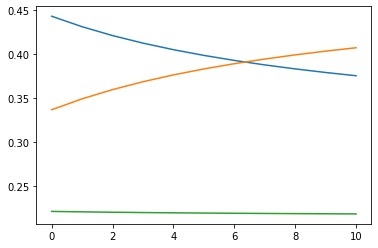

In [40]:
cdf_calc.sensitivityCellSupermatrixShort(super,8,"4Alternatives",Energy)

cdf_calc.sensitivityCellSupermatrixPlot(super,8,"4Alternatives",Energy)

0.0
Synthesized results: [0.4522 0.3218 0.226 ]
0.1
Synthesized results: [0.4434 0.336  0.2206]
0.2
Synthesized results: [0.4361 0.3477 0.2162]
0.30000000000000004
Synthesized results: [0.4299 0.3577 0.2124]
0.4
Synthesized results: [0.4247 0.3661 0.2092]
0.5
Synthesized results: [0.4201 0.3735 0.2064]
0.6000000000000001
Synthesized results: [0.4161 0.3799 0.204 ]
0.7000000000000001
Synthesized results: [0.4126 0.3855 0.2019]
0.8
Synthesized results: [0.4095 0.3905 0.2   ]
0.9
Synthesized results: [0.4067 0.395  0.1983]
1.0
Synthesized results: [0.4042 0.399  0.1967]
0.0
Synthesized results: [0.4522 0.3218 0.226 ]
0.1
Synthesized results: [0.4434 0.336  0.2206]
0.2
Synthesized results: [0.4361 0.3477 0.2162]
0.30000000000000004
Synthesized results: [0.4299 0.3577 0.2124]
0.4
Synthesized results: [0.4247 0.3661 0.2092]
0.5
Synthesized results: [0.4201 0.3735 0.2064]
0.6000000000000001
Synthesized results: [0.4161 0.3799 0.204 ]
0.7000000000000001
Synthesized results: [0.4126 0.3855 0.20

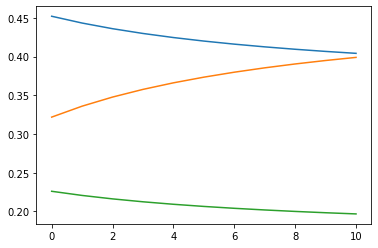

In [41]:
cdf_calc.sensitivityCellSupermatrixShort(super,4,"4Alternatives",Energy)

cdf_calc.sensitivityCellSupermatrixPlot(super,4,"4Alternatives",Energy)

0.0
Synthesized results: [0.4328 0.3515 0.2158]
0.1
Synthesized results: [0.4444 0.3346 0.221 ]
0.2
Synthesized results: [0.454  0.3206 0.2254]
0.30000000000000004
Synthesized results: [0.4622 0.3087 0.2291]
0.4
Synthesized results: [0.4692 0.2985 0.2323]
0.5
Synthesized results: [0.4753 0.2897 0.235 ]
0.6000000000000001
Synthesized results: [0.4806 0.282  0.2374]
0.7000000000000001
Synthesized results: [0.4853 0.2752 0.2395]
0.8
Synthesized results: [0.4894 0.2691 0.2414]
0.9
Synthesized results: [0.4931 0.2637 0.2431]
1.0
Synthesized results: [0.4965 0.2589 0.2446]
0.0
Synthesized results: [0.4328 0.3515 0.2158]
0.1
Synthesized results: [0.4444 0.3346 0.221 ]
0.2
Synthesized results: [0.454  0.3206 0.2254]
0.30000000000000004
Synthesized results: [0.4622 0.3087 0.2291]
0.4
Synthesized results: [0.4692 0.2985 0.2323]
0.5
Synthesized results: [0.4753 0.2897 0.235 ]
0.6000000000000001
Synthesized results: [0.4806 0.282  0.2374]
0.7000000000000001
Synthesized results: [0.4853 0.2752 0.23

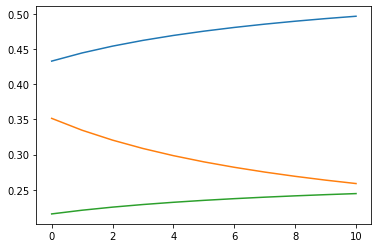

In [42]:
cdf_calc.sensitivityCellSupermatrixShort(super,5,"4Alternatives",Energy)

cdf_calc.sensitivityCellSupermatrixPlot(super,5,"4Alternatives",Energy)

0.0
Synthesized results: [0.4482 0.3276 0.2241]
0.1
Synthesized results: [0.4454 0.3326 0.2221]
0.2
Synthesized results: [0.443  0.3366 0.2204]
0.30000000000000004
Synthesized results: [0.4411 0.3399 0.219 ]
0.4
Synthesized results: [0.4394 0.3427 0.2178]
0.5
Synthesized results: [0.438  0.3451 0.2168]
0.6000000000000001
Synthesized results: [0.4368 0.3472 0.216 ]
0.7000000000000001
Synthesized results: [0.4358 0.349  0.2152]
0.8
Synthesized results: [0.4348 0.3506 0.2145]
0.9
Synthesized results: [0.434  0.3521 0.2139]
1.0
Synthesized results: [0.4333 0.3533 0.2134]
0.0
Synthesized results: [0.4482 0.3276 0.2241]
0.1
Synthesized results: [0.4454 0.3326 0.2221]
0.2
Synthesized results: [0.443  0.3366 0.2204]
0.30000000000000004
Synthesized results: [0.4411 0.3399 0.219 ]
0.4
Synthesized results: [0.4394 0.3427 0.2178]
0.5
Synthesized results: [0.438  0.3451 0.2168]
0.6000000000000001
Synthesized results: [0.4368 0.3472 0.216 ]
0.7000000000000001
Synthesized results: [0.4358 0.349  0.21

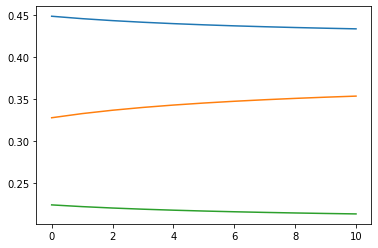

In [43]:
cdf_calc.sensitivityCellSupermatrixShort(super,6,"4Alternatives",Energy)

cdf_calc.sensitivityCellSupermatrixPlot(super,6,"4Alternatives",Energy)

In [44]:
#ER - Proposed commands

# print(Energy.all_pc_matrices)
listTitles=cdf_calc.nodeNameList(Energy)

super=cdf_calc.calcUnweightedSuperMatrix(Energy)

df = pd.DataFrame (super,index=listTitles,columns=listTitles)
filepath = "excelSupermatrix.xlsx"
df.to_excel(filepath)


limit = cdf_calc.calcLimitingPriorities(Energy.supermatrix)
df2 = pd.DataFrame (limit,index=listTitles)
filepath = "excelLimitPriorities.xlsx"
df2.to_excel(filepath)

bycluster = cdf_calc.calcPrioritiesNormalizedByCluster(Energy.supermatrix, Energy)
df3 = pd.DataFrame (bycluster,index=listTitles)
filepath = "excelLimitByCluster.xlsx"
df3.to_excel(filepath)


[[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.2409 0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.2057 0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.1655 0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.1035 0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.0882 0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.1962 0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.     0.     0.     0.3333 0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.     0.     0.     0.6667 0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.     0.6093 0.4436 0.     0.3573 0.5599 0.42   0.2785 0.3018 0.
  0.     0.    ]
 [0.     0.2041 0.2627 0.     0.4746 0.1668 0.3761 0.5242 0.4837 0.
  0.     0.    ]
 [0.     0.1865 0.2938 0.     0.1681 0.2733 0.2039 0.1973 0.2145 